# perceptron
# (Artificial neuron)
    .A perceptron is a single layer neural network
    .It acts as a linear classifier,binary classification
    .Loss function:binary cross entropy
    .optimization:Gradient desent

## Learning goals
    .How to implement perceptron?
    .understanding vactorization,
    writing efficient code
    .What is the meaning of "Linear classification"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y=make_blobs?

TypeError: cannot unpack non-iterable function object

In [4]:
X,Y=make_blobs(n_samples=500,
    n_features=2,
    centers=2,
    random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


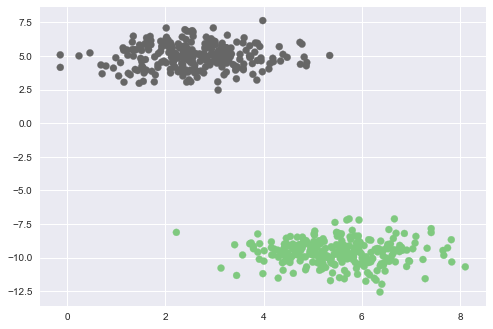

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and Helper functions

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
#sigmoid(5)
z=np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

## Implement perceptron learning algorithm
    -learn the rate
    -reduce the loss
    -make the pridiction

In [8]:
def pridict(x,weights):
    z= np.dot(x,weights)
    pridections=sigmoid(z)
    return pridections

def loss(x,y,weights):
    y_=pridict(x,weights)
    cost=np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
    return cost

def update(x,y,weights,learning_rate):
    y_=pridict(x,weights)
    dw=np.dot(x.T,y_-y)
    
    m=x.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    
    return weights
    
def train(x,y,learning_rate=0.8,max_epochs=100):
    #modify the input to handle bias term
    ones=np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    #init weights = 0
    weights=np.zeros(x.shape[1])
    #iterate over all epochs and make updates
    for epochs in range(max_epochs):
        weights=update(x,y,weights,learning_rate)
        if epochs %10==0:
            l=loss(x,y,weights)
            print("%d epochs %.4f loss"%(epochs,l))
    return weights

In [9]:
weights=train(X,Y,max_epochs=1000)

0 epochs 0.0000 loss
10 epochs 0.0000 loss
20 epochs 0.0000 loss
30 epochs 0.0000 loss
40 epochs 0.0000 loss
50 epochs 0.0000 loss
60 epochs 0.0000 loss
70 epochs 0.0000 loss
80 epochs 0.0000 loss
90 epochs 0.0000 loss
100 epochs 0.0000 loss
110 epochs 0.0000 loss
120 epochs 0.0000 loss
130 epochs 0.0000 loss
140 epochs 0.0000 loss
150 epochs 0.0000 loss
160 epochs 0.0000 loss
170 epochs 0.0000 loss
180 epochs 0.0000 loss
190 epochs 0.0000 loss
200 epochs 0.0000 loss
210 epochs 0.0000 loss
220 epochs 0.0000 loss
230 epochs 0.0000 loss
240 epochs 0.0000 loss
250 epochs 0.0000 loss
260 epochs 0.0000 loss
270 epochs 0.0000 loss
280 epochs 0.0000 loss
290 epochs 0.0000 loss
300 epochs 0.0000 loss
310 epochs 0.0000 loss
320 epochs 0.0000 loss
330 epochs 0.0000 loss
340 epochs 0.0000 loss
350 epochs 0.0000 loss
360 epochs 0.0000 loss
370 epochs 0.0000 loss
380 epochs 0.0000 loss
390 epochs 0.0000 loss
400 epochs 0.0000 loss
410 epochs 0.0000 loss
420 epochs 0.0000 loss
430 epochs 0.0000 loss

## perceptron implementation 
    -make pridiction
    -visualize decision surface
    -linear vs non linear classification

In [10]:
def getpredict(x_test,weights,labels=True):
    if x_test.shape[1]!=weights.shape[0]:
        ones=np.ones((x_test.shape[0],1))
        x_test=np.hstack((ones,x_test))
    prob=pridict(x_test,weights)
    
    if not labels:
        return prob
    else:
        labels=np.zeros(prob.shape)
        labels[prob>=.5]=1
        return labels

In [13]:
x1=np.linspace(-8,8,10)
print (x1)
x2=-(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-8.         -6.22222222 -4.44444444 -2.66666667 -0.88888889  0.88888889
  2.66666667  4.44444444  6.22222222  8.        ]
[-1.45533748 -1.13326938 -0.81120127 -0.48913317 -0.16706507  0.15500304
  0.47707114  0.79913924  1.12120735  1.44327545]


<function matplotlib.pyplot.show(*args, **kw)>

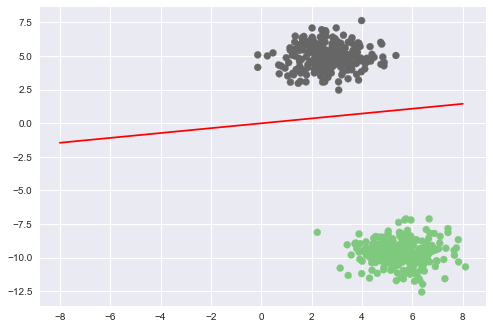

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show

In [19]:
# find the accuracy
y=getpredict(X,weights,labels=True)
print(y)
y==Y

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
training_acc = np.sum(y==Y)/Y.shape[0]
print(training_acc)

1.0
